In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [29]:
data_folder = './processed_data_/'
data_file_path = os.path.join(data_folder, 'tesla_processed_dataset_2015_2025.parquet')

df = pd.read_parquet(data_file_path)

print(df.info())

print('\nRegions:', df['Region'].unique())
print('\nModels:', df['Model'].unique())
print("\nSource Types:", df['Source_Type'].unique())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2640 entries, 2023-05-01 to 2018-08-01
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Region                2640 non-null   category
 1   Model                 2640 non-null   category
 2   Estimated_Deliveries  2640 non-null   int64   
 3   Production_Units      2640 non-null   int64   
 4   Avg_Price_USD         2640 non-null   float64 
 5   Battery_Capacity_kWh  2640 non-null   int64   
 6   Range_km              2640 non-null   int64   
 7   CO2_Saved_tons        2640 non-null   float64 
 8   Source_Type           2640 non-null   category
 9   Charging_Stations     2640 non-null   int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 173.3 KB
None

Regions: ['Europe', 'Asia', 'North America', 'Middle East']
Categories (4, object): ['Asia', 'Europe', 'Middle East', 'North America']

Models: ['Model S', 'Model X', 'Model 3', 'M

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated_Deliveries,2640.0,9922.199621,3935.950093,48.00,7292.000,9857.000,12510.2500,25704.00
Production_Units,2640.0,10655.847348,4260.600858,50.00,7828.250,10546.500,13469.0000,28939.00
Avg_Price_USD,2640.0,84907.340330,20123.258036,50003.70,67726.365,85058.510,102373.0425,119965.36
Battery_Capacity_kWh,2640.0,87.059470,20.836265,60.00,75.000,82.000,100.0000,120.00
Range_km,2640.0,500.257576,120.868549,330.00,418.000,470.000,586.2500,719.00
CO2_Saved_tons,2640.0,744.076989,353.221224,3.07,499.620,699.515,943.7650,2548.55
Charging_Stations,2640.0,8932.133712,3469.565883,3002.00,5897.750,8901.500,11938.0000,14996.00
Year,2640.0,2020.000000,3.162877,2015.00,2017.000,2020.000,2023.0000,2025.00


In [26]:
df.describe(include='category').T

,count,unique,top,freq
Region,2640,4,Asia,660
Model,2640,5,Cybertruck,528
Source_Type,2640,3,Interpolated (Month),884


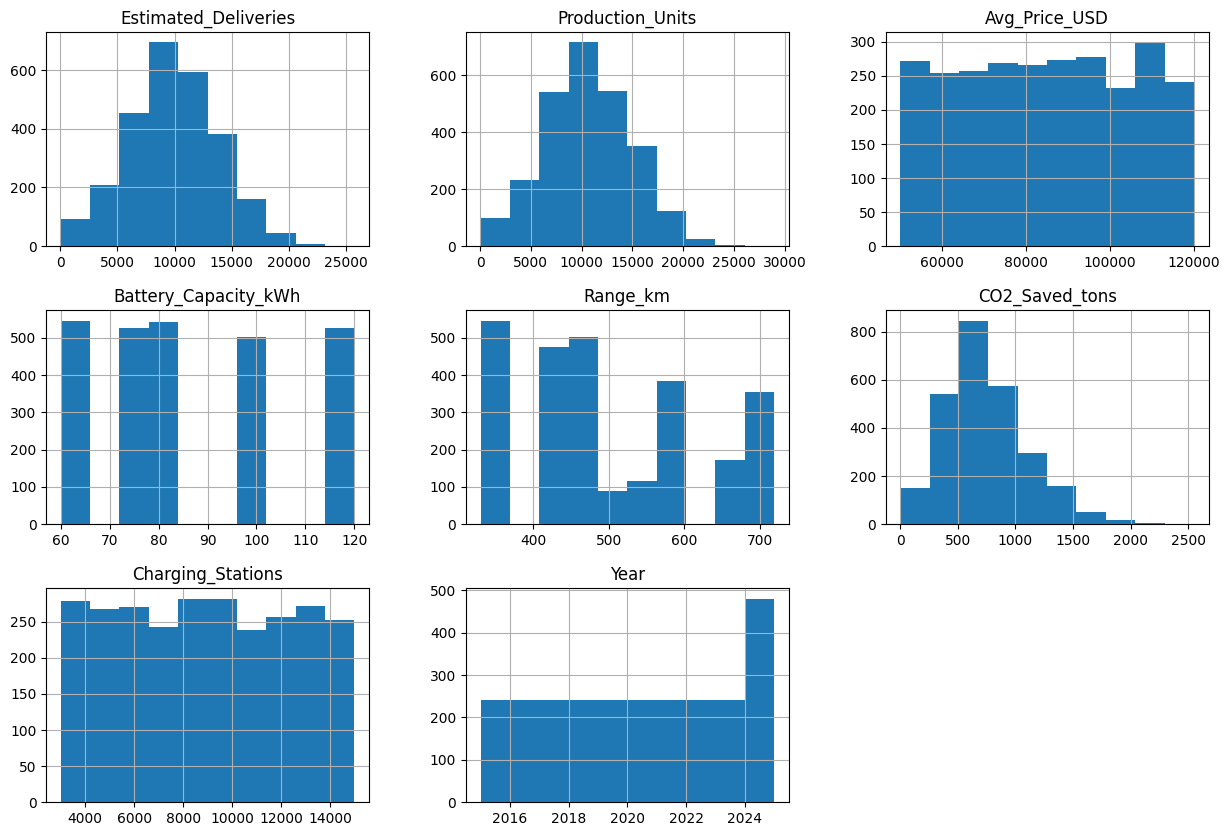

In [18]:
df.hist(figsize=(15, 10))
plt.show()

<Axes: >

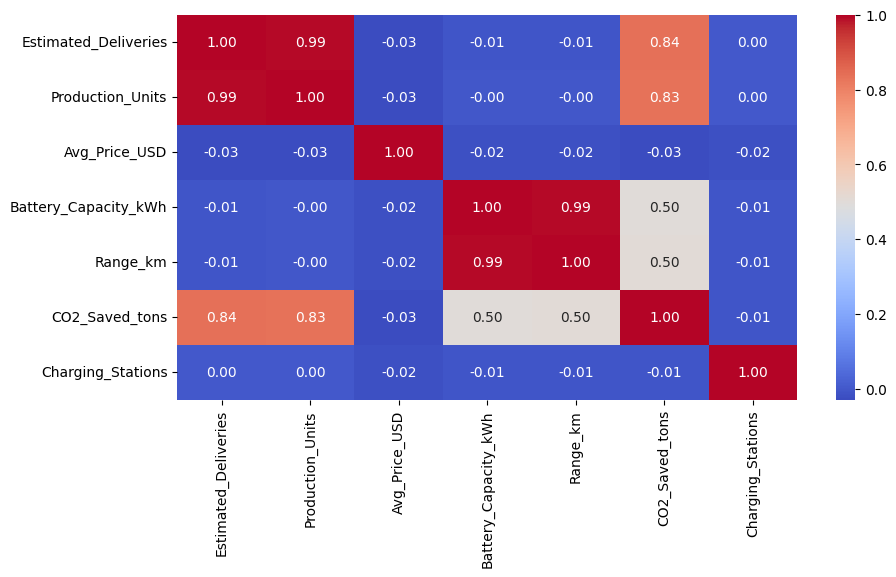

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')

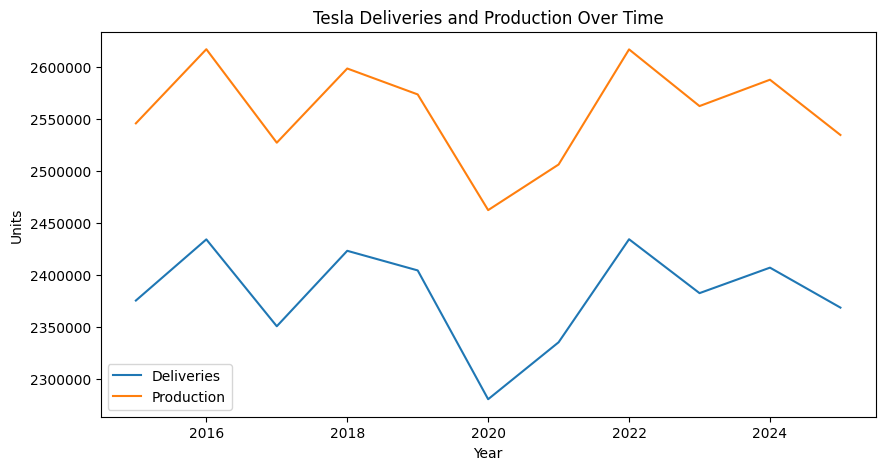

In [128]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Estimated_Deliveries', label='Deliveries',estimator='sum',errorbar=None)
sns.lineplot(data=df, x='Year', y='Production_Units', label='Production',estimator='sum',errorbar=None)
plt.title('Tesla Deliveries and Production Over Time')
plt.ylabel('Units')
plt.ticklabel_format(style='plain')
plt.show()

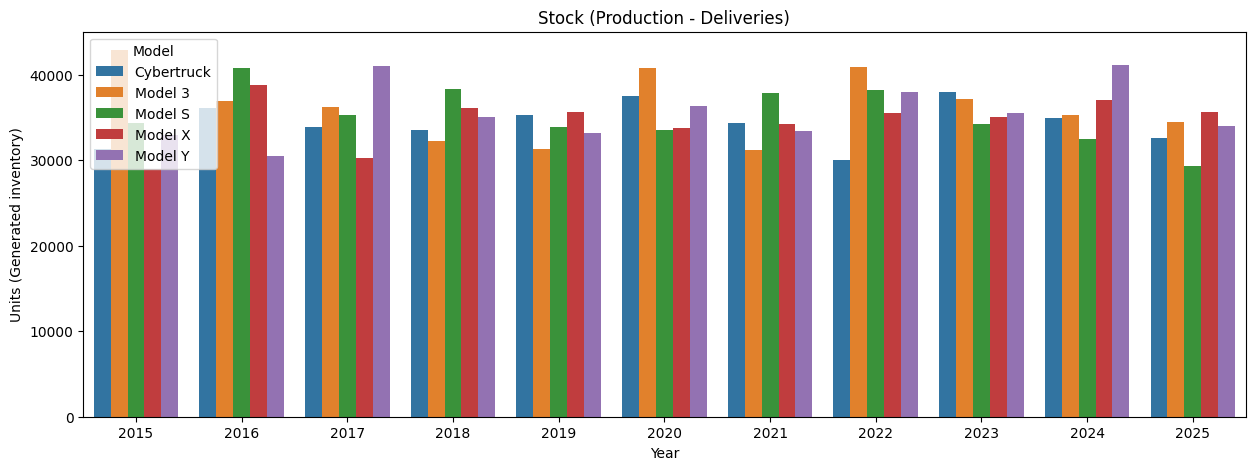

In [131]:
df['production_gap'] = df['Production_Units'] - df['Estimated_Deliveries']

plt.figure(figsize=(15,5))
sns.barplot(
    data=df,
    x='Year',
    y='production_gap',
    hue='Model',
    estimator='sum',
    errorbar=None
)
plt.title('Stock (Production - Deliveries)')
plt.ylabel('Units (Generated inventory)')
plt.show()

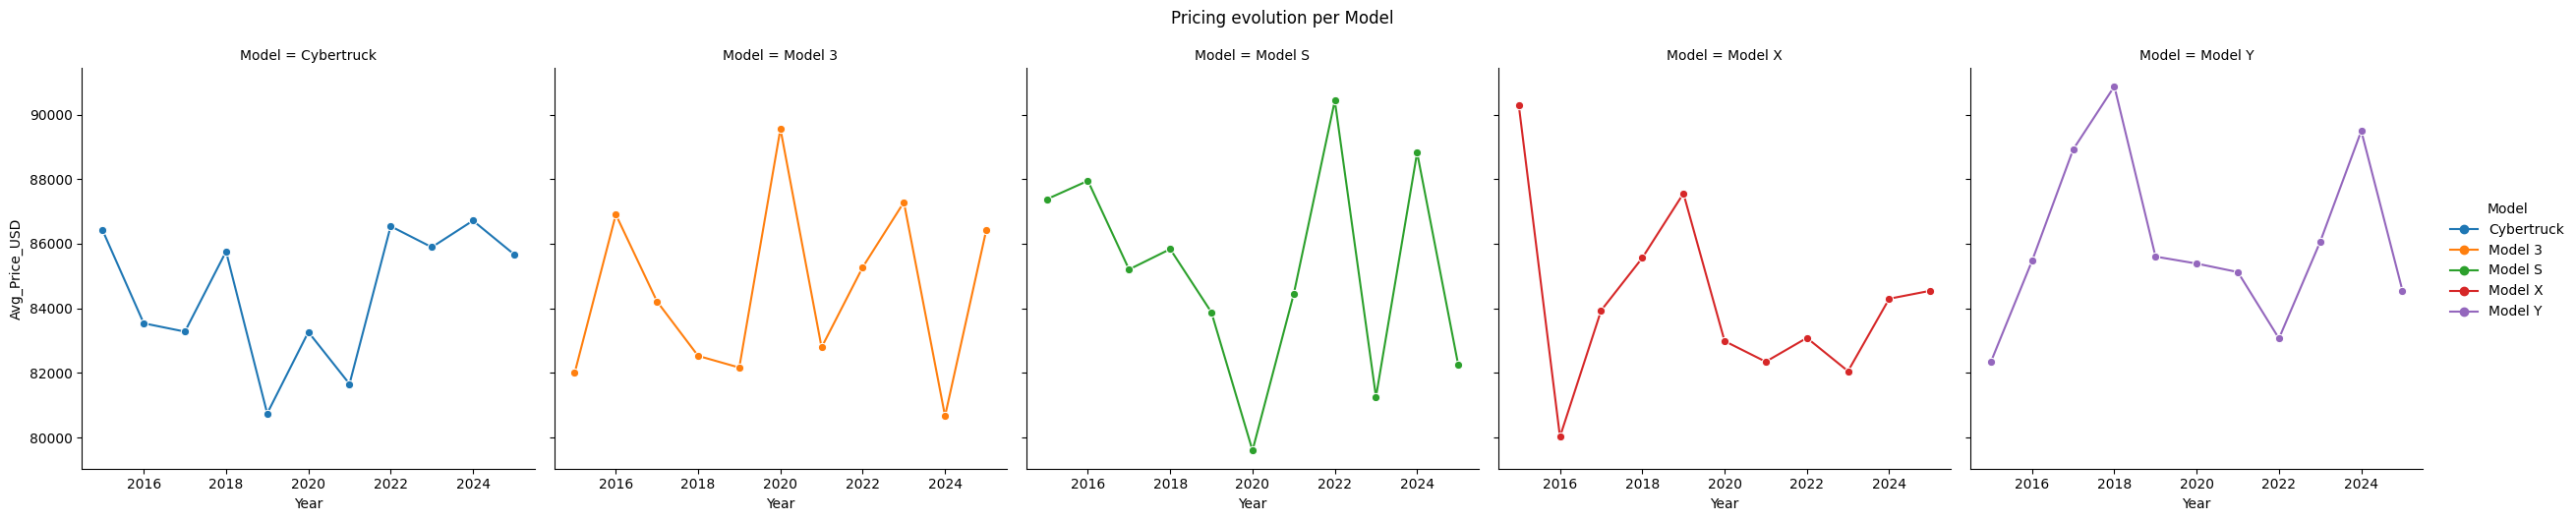

In [135]:
g = sns.relplot(
    data=df,
    x='Year',
    y='Avg_Price_USD',
    hue='Model',
    col='Model',
    kind='line',
    marker='o',
    errorbar=None
)
g.fig.suptitle('Pricing evolution per Model', y=1.05)
g.set_axis_labels('Year', 'Avg_Price_USD')
plt.show()

Text(0.5, 1.0, 'Production per Model')

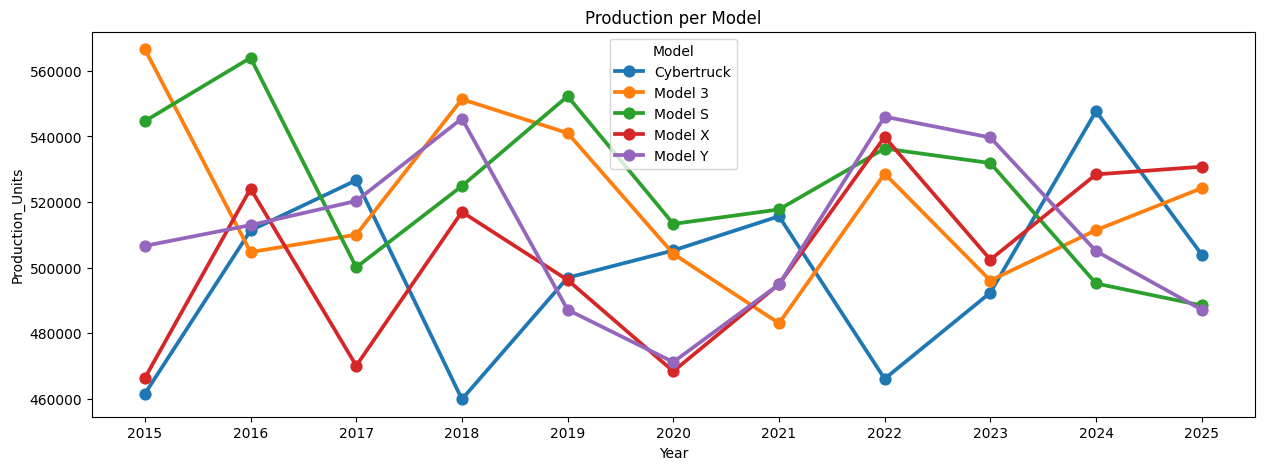

In [136]:
plt.figure(figsize=(15, 5))
sns.pointplot(
    data=df,
    x='Year',
    y='Production_Units',
    hue='Model',
    estimator='sum',
    errorbar=None
)
plt.title('Production per Model')

C:\Users\Thiag\AppData\Local\Temp\ipykernel_13912\1240258799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_sales = df.groupby('Model')['Estimated_Deliveries'].sum().sort_values(ascending=False).reset_index()


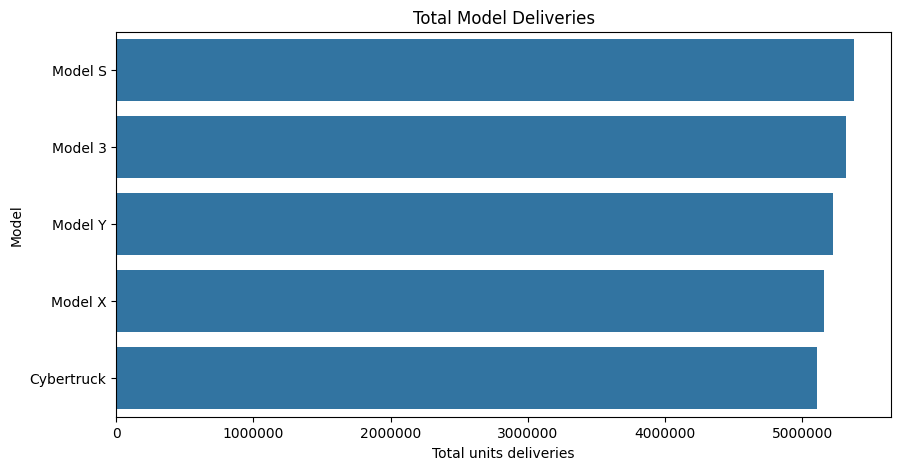

In [137]:
model_sales = df.groupby('Model')['Estimated_Deliveries'].sum().sort_values(ascending=False).reset_index()

order_list = model_sales['Model']

plt.figure(figsize=(10,5))
sns.barplot(
    data=model_sales,
    x='Estimated_Deliveries',
    y='Model',
    order=order_list,
    estimator='sum'
)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total Model Deliveries')
plt.xlabel('Total units deliveries')
plt.ylabel('Model')
plt.show()


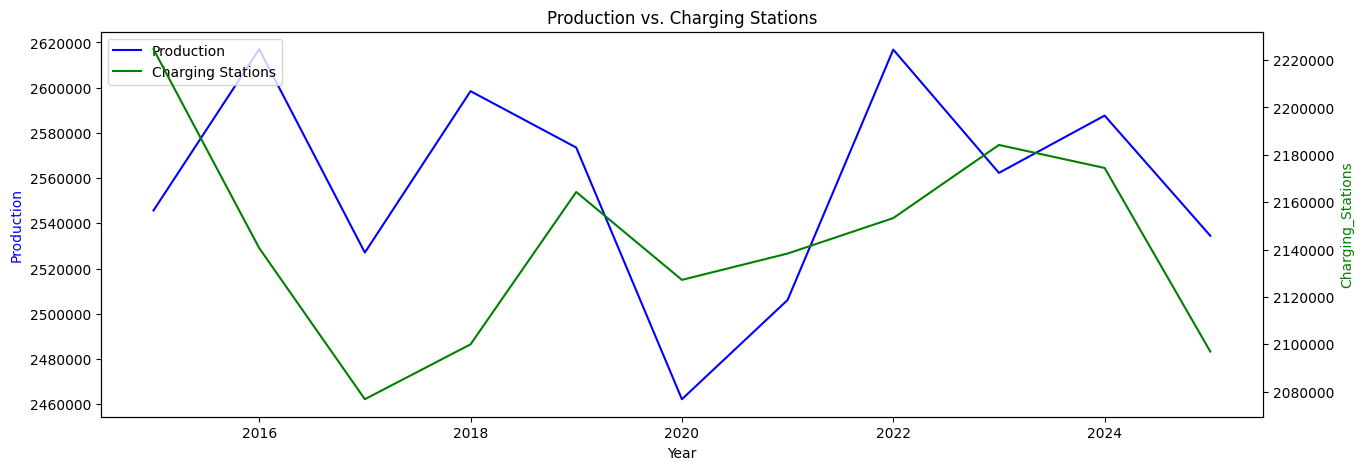

In [159]:
fig, ax1 = plt.subplots(figsize=(15,5))

color1 = 'blue'
ax1.set_ylabel('Production', color=color1)
sns.lineplot(
    data=df,
    x='Year',
    y='Production_Units',
    estimator='sum',
    errorbar=None,
    ax=ax1,
    color=color1,
    label='Production'
)
plt.ticklabel_format(style='plain')

ax2 = ax1.twinx()

color2 = 'green'
ax2.set_ylabel('Charging_Stations', color=color2)
sns.lineplot(
    data=df,
    x='Year',
    y='Charging_Stations',
    estimator='sum',
    errorbar=None,
    ax=ax2,
    color=color2,
    label='Charging Stations'
)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Production vs. Charging Stations')
plt.ticklabel_format(style='plain')
plt.show()